In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

In [2]:
R = lambda x: 1/(1+25*x**2)

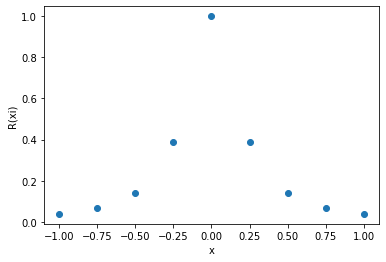

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
## Oppgave 1

# Evenly spread points
xi = np.linspace(start = -1.0, stop=1.0, num= 9, endpoint= True)
yi = np.array(R(xi))
x = np.linspace(-1, 1, 101)

#plot of Points R(xi)
plt.plot(xi, yi, 'o')
plt.xlabel('x')
plt.ylabel('R(xi)')
plt.show()

np.arange(0, len(xi), 1)

In [4]:
def lagrange_polynomial(xi, yi, x):
    # Related to cardinal and lagrange function at
    # https://www.math.n(tnu.no/emner/TMA4125/2021v/lectures/LagrangeInterpolation.pdf

    n = len(xi)  # Number of evaluation points x
    l = []
    for i in range(n):  # Loop over li for index i and calculate for all x
        li = np.ones(len(x))
        for j in range(n):  # Loop over li to make index j, and intermediate calculation of i and j
            if i is not j:
                li = li * (x - xi[j]) / (xi[i] - xi[j])
        l.append(li)  # Append the array to the list

    P = 0
    for k in range(len(yi)):
        P = P + yi[k] * l[k]
    return P

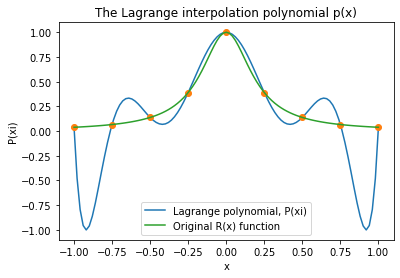

In [5]:
# Plot Lagrange Polynom
plt.plot(x, lagrange_polynomial(xi=xi, yi=yi, x=x), label='Lagrange polynomial, P(xi)') # Plot the polynomial
plt.plot(xi, yi, 'o') # Plot the interpolation points
plt.plot(x, R(x), label='Original R(x) function') # Plot the Original function
plt.title('The Lagrange interpolation polynomial p(x)')
plt.xlabel('x')
plt.ylabel('P(xi)')
plt.legend()
plt.show()

In [6]:
def cubic_spline(xi, yi, x=np.linspace(-1, 1, 101)):
    """
Takes inn a list of the x values and yi=R(xi)
returns a vector of spline results
    """

# Some relation in the first part to qubic_spline function in
# https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa
    S=[]

    ### get the diffreces in the measure (deltas)
    n = len(xi)
    delta_x = np.diff(xi)
    delta_y = np.diff(yi)

    ### Get matrix A
    A = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, 1))
    A[0, 0] = 1
    A[-1, -1] = 1

    for i in range(1, n - 1):
        A[i, i - 1] = delta_x[i - 1]
        A[i, i + 1] = delta_x[i]
        A[i, i] = 2 * (delta_x[i - 1] + delta_x[i])
        ### Get matrix b
        b[i, 0] = 3 * (delta_y[i] / delta_x[i] - delta_y[i - 1] / delta_x[i - 1])

    ### Solves for c in Ac = b
    c = solve(a=A, b=b)

    ### Solves for d and b
    d = np.zeros(shape=(n - 1, 1))
    b = np.zeros(shape=(n - 1, 1))
    for i in range(0, len(d)):
        d[i] = (c[i + 1] - c[i]) / (3 * delta_x[i])
        b[i] = (delta_y[i] / delta_x[i]) - (delta_x[i] / 3) * (2 * c[i] + c[i + 1])
    ### calculate the Splines for each node
    for i in range(0, n-1):
        Si= yi[i]\
            +b[i]*(np.linspace(xi[i],xi[i+1])-xi[i])\
            +c[i]*(np.linspace(xi[i],xi[i+1])-xi[i])**2\
            +d[i]*(np.linspace(xi[i],xi[i+1])-xi[i])**3
        S.append(Si)

    return S

In [7]:
S1=cubic_spline(xi=xi, yi=yi, x=x)[0]
S2=cubic_spline(xi=xi, yi=yi, x=x)[1]
S3=cubic_spline(xi=xi, yi=yi, x=x)[2]
S4=cubic_spline(xi=xi, yi=yi, x=x)[3]
S5=cubic_spline(xi=xi, yi=yi, x=x)[4]
S6=cubic_spline(xi=xi, yi=yi, x=x)[5]
S7=cubic_spline(xi=xi, yi=yi, x=x)[6]
S8=cubic_spline(xi=xi, yi=yi, x=x)[7]

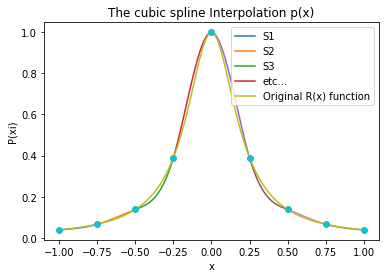

In [8]:
#Plot of Natural Cubic Spline#Plot of Natural Cubic Spline
plt.plot(np.linspace(xi[0],xi[1]), S1, label='S1') # plot of cubic spline from 0 -> 1
plt.plot(np.linspace(xi[1],xi[2]), S2, label='S2') # plot of cubic spline from 1 -> 2
plt.plot(np.linspace(xi[2],xi[3]), S3, label='S3') # plot of cubic spline from 2 -> 3
plt.plot(np.linspace(xi[3],xi[4]), S4, label='etc...') # plot of cubic spline from 3 -> 4
plt.plot(np.linspace(xi[4],xi[5]), S5) # plot of cubic spline from 4 -> 5
plt.plot(np.linspace(xi[5],xi[6]), S6) # plot of cubic spline from 5 -> 6
plt.plot(np.linspace(xi[6],xi[7]), S7) # plot of cubic spline from 6 -> 7
plt.plot(np.linspace(xi[7],xi[8]), S8) # plot of cubic spline from 7 -> 8
plt.plot(x, R(x), label='Original R(x) function') # Plot the Original function
plt.plot(xi, yi, 'o') # Plot the interpolation points
plt.title('The cubic spline Interpolation p(x)')
plt.xlabel('x')
plt.ylabel('P(xi)')
plt.legend()
plt.show()

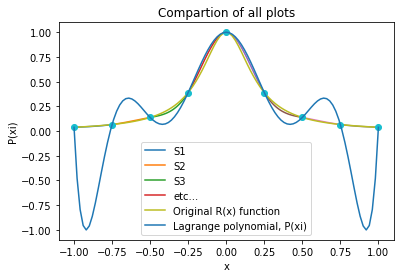

In [9]:
#Consolidation of all plots for compartion
plt.plot(np.linspace(xi[0],xi[1]), S1, label='S1') # plot of cubic spline from 0 -> 1
plt.plot(np.linspace(xi[1],xi[2]), S2, label='S2') # plot of cubic spline from 1 -> 2
plt.plot(np.linspace(xi[2],xi[3]), S3, label='S3') # plot of cubic spline from 2 -> 3
plt.plot(np.linspace(xi[3],xi[4]), S4, label='etc...') # plot of cubic spline from 3 -> 4
plt.plot(np.linspace(xi[4],xi[5]), S5) # plot of cubic spline from 4 -> 5
plt.plot(np.linspace(xi[5],xi[6]), S6) # plot of cubic spline from 5 -> 6
plt.plot(np.linspace(xi[6],xi[7]), S7) # plot of cubic spline from 6 -> 7
plt.plot(np.linspace(xi[7],xi[8]), S8) # plot of cubic spline from 7 -> 8
plt.plot(x, R(x), label='Original R(x) function') # Plot the Original function
plt.plot(xi, yi, 'o') # Plot the interpolation points
plt.plot(x, lagrange_polynomial(xi=xi, yi=yi, x=x), label='Lagrange polynomial, P(xi)') # Plot the polynomial
plt.title('Compartion of all plots')
plt.xlabel('x')
plt.ylabel('P(xi)')
plt.legend()
plt.show()